# Registration Sandbox
This notebook is a test-bed for regularization and reconstruction methods

In [6]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob

# Debugging imports
import llops as yp
import numpy as np
import matplotlib.pyplot as plt

yp.config.setDefaultBackend('numpy')
yp.config.setDefaultDatatype('float32')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [7]:
# Define user for path setting
dataset_path = '/Users/zfphil/datasets/motiondeblur/'

# Define which dataset to use
dataset_type = 'coded'
dataset_label =  '163c'

# Find files in this directory
folder_list = glob.glob(os.path.join(dataset_path, '*/'))
dataset_list = [folder for folder in folder_list if isDataset(folder)]

# Filter datasets in directory
filtered_dataset_list = [folder_name for folder_name in folder_list if (dataset_type in folder_name) and (dataset_label in folder_name)]
assert not len(filtered_dataset_list) > 1, "More than one dataset with criterion found!"
assert not len(filtered_dataset_list) == 0, "No dataset with criterion found!"

# Create dataset object (loads metadata)
dataset = Dataset(filtered_dataset_list[0])

# Force type to be motiondeblur
dataset.metadata.type = 'motiondeblur'

# Select green channel
dataset.channel_mask = [0]

# Preprocess dataset (md-specific)
md.preprocess(dataset)

Loading 1 frames...


# Create Reconstruction Object And Normalize Measurements

In [8]:
# Set position segment
dataset.position_segment_indicies = [12]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=0)

# # Apply position offset
# recon.applyPositionOffset()

# # Apply segment lateral offset
# recon.applySegmentLateralOffset()

# # Generate the forward model (Need to call this after applyPositionOffset)
# recon._gen_forward_model()

Loading 35 frames...


## Phase-Correlation Based Registration

In [9]:
offsets_xc = recon.register_measurements(method='xc', preprocess_methods=['normalize', 'highpass'], replace_untrusted=True,
                                         debug=False, write_results=False, energy_ratio_threshold=100.0)

/Users/zfphil/develop/libwallerlab/submodules/ndoperators/submodules/llops/llops/fft.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:] = pyfftw.interfaces.numpy_fft.ifft2(x, axes=axes)


## ORB-Based Registration

In [15]:
offsets_orb = recon.register_measurements(method='orb', preprocess_methods=['normalize'], debug=False, write_results=False, replace_untrusted=True)

===
0.3831305140884606
40.0
104.4030650891055
[50. 15.]
===
0.061788166187705634
40.0
647.3731535984482
[322.  33.]
===
0.08617808141029165
40.0
464.15514647583086
[232.  -6.]
===
0.11737525787280782
40.0
340.7873237079102
[153.  75.]
===
0.08287134720863351
40.0
482.675874681965
[238.  40.]
===
0.3275608910402092
40.0
122.11470017978998
[ 32. -52.]
===
0.1350796444875934
40.0
296.1215966457023
[-131.   69.]
===
0.08793609016906588
40.0
454.875807226544
[-208.  -92.]
===
0.11881840409104537
40.0
336.6481843111589
[163.  42.]
===
0.21514084233634992
40.0
185.9247159470736
[-79.  49.]
===
0.17719247798458349
40.0
225.7432169523594
[-56.  98.]
===
0.0678872350774979
40.0
589.2123895506611
[292. -39.]
===
0.35714285714285715
40.0
112.0
[  0. -56.]


# Compare XC and ORB

<IPython.core.display.Javascript object>


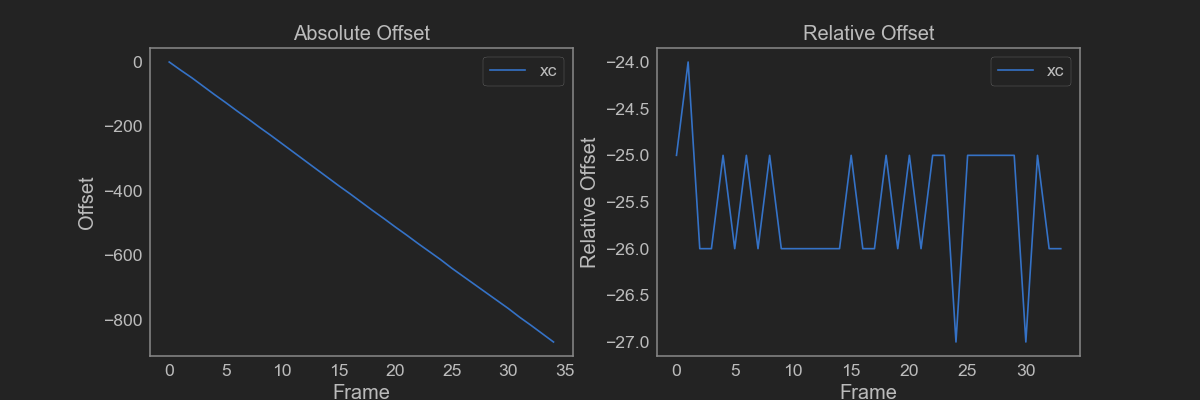

In [13]:

plt.figure()
plt.subplot(121)
plt.plot(np.asarray(offsets_xc)[:, 1], label='xc')
# plt.plot(np.asarray(offsets_orb)[:, 1], label='orb')
plt.legend()
plt.xlabel('Frame')
plt.ylabel('Offset')
plt.title('Absolute Offset')

plt.subplot(122)
plt.plot(np.diff(np.asarray(offsets_xc)[:, 1]), label='xc')
# plt.plot(np.diff(np.asarray(offsets_orb)[:, 1]), label='orb')
plt.legend()
plt.xlabel('Frame')
plt.ylabel('Relative Offset')
plt.title('Relative Offset')

plt.savefig('registration.png', transparent=True, dpi=300)


## Optimization-Based Registration

In [14]:
!open .

In [ ]:
offsets = recon.register_measurements(method='optimize', preprocess_methods=['normalize'], axis=1, debug=False, write_results=True)
print(offsets)